In [1]:
#importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing the dataset
data = pd.read_excel('Delhi.xlsx',na_values='-')
data.head()

#Data Unnamed: 1
0  #Attribution: IMD - India Meteorological Depar...        NaN
1                                               date       pm25
2                                2018-04-20 00:00:00         92
3                                2018-04-19 23:00:00         89
4                                2018-04-19 22:00:00         75

In [3]:
#dropping the first two rows
data.drop([0,1],axis=0,inplace=True)

#renaming the column
data.columns=['Date','pm']

data.head()

Date  pm
2  2018-04-20 00:00:00  92
3  2018-04-19 23:00:00  89
4  2018-04-19 22:00:00  75
5  2018-04-19 21:00:00  57
6  2018-04-19 20:00:00  57

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2374 entries, 2 to 2375
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    2374 non-null   object
 1   pm      2294 non-null   object
dtypes: object(2)
memory usage: 55.6+ KB


Both Date and pm variables are not in proper dtype form. So convert the Date dtype to datetime and pm to integer

In [5]:
#checking null value in the data
data.isna().sum()

Date     0
pm      80
dtype: int64

In [6]:
data.Date = pd.to_datetime(data.Date)
data.set_index('Date',inplace=True)
data.head()

pm
Date                   
2018-04-20 00:00:00  92
2018-04-19 23:00:00  89
2018-04-19 22:00:00  75
2018-04-19 21:00:00  57
2018-04-19 20:00:00  57

In [7]:
#defining the function for plotting the graph
def plot_ts(x):
    plt.figure(figsize=(15,6))
    plt.plot(x)
    plt.xlabel('Date')
    plt.ylabel('pm value')

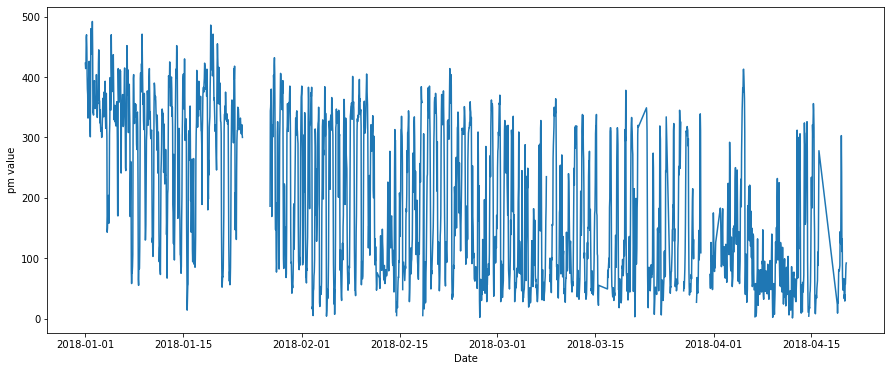

In [8]:
#plotting the 'pm' values
plot_ts(data)

From the above graph it is observed that, there are few places where curve has moved like a straight line 

In [9]:
#calculating total records to be available in the dataset
jan = 31*24; feb = 28*24; mar = 31*24; apr = 19*24+1
total = jan+feb+mar+apr
print('Total records according to calculation = ',total)
print('Actual records present = ',len(data))
print('missing records in datetime variable is ',total-len(data))

Total records according to calculation =  2617
Actual records present =  2374
missing records in datetime variable is  243


In [10]:
#creating the dataframe with date between 01-01-2018 to 19-04-2018
import datetime

start = datetime.datetime.strptime("01-01-2018", "%d-%m-%Y")
end = datetime.datetime.strptime("20-04-2018", "%d-%m-%Y")
#date_generated = [start + datetime.timedelta(days=x,hours=1) for x in range(0, (end-start).days)]
a=[]
for x in range(0, (end-start).days):
    for y in range(0,24):
        date_generated = start + datetime.timedelta(days=x,hours=y)
        a.append(date_generated)
b=[]
for date in a:
    b.append(date)

#adding the one more date value
b.append(datetime.datetime(2018, 4, 20))

data1 = pd.DataFrame(b,columns=['Date'])
data1['pm'] = np.nan
data1

Date  pm
0    2018-01-01 00:00:00 NaN
1    2018-01-01 01:00:00 NaN
2    2018-01-01 02:00:00 NaN
3    2018-01-01 03:00:00 NaN
4    2018-01-01 04:00:00 NaN
...                  ...  ..
2612 2018-04-19 20:00:00 NaN
2613 2018-04-19 21:00:00 NaN
2614 2018-04-19 22:00:00 NaN
2615 2018-04-19 23:00:00 NaN
2616 2018-04-20 00:00:00 NaN

[2617 rows x 2 columns]

In [11]:
#updating the 'data1' Dataframe with values of 'data' Dataframe
for i in tqdm(range(0,len(data))):
    for j in range(0,len(data1)):
        if (data.index[i] == data1.Date[j]):
            data1['pm'][j] = data.pm[i]
            break

100%|██████████████████████████████████████| 2374/2374 [10:28<00:00,  3.78it/s]


In [12]:
#checking null values for updated Dataframe
data1.isna().sum()

Date      0
pm      323
dtype: int64

In [13]:
#checking datatypes of variable
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2617 entries, 0 to 2616
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2617 non-null   datetime64[ns]
 1   pm      2294 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 41.0 KB


In [14]:
data1.set_index('Date',inplace=True)

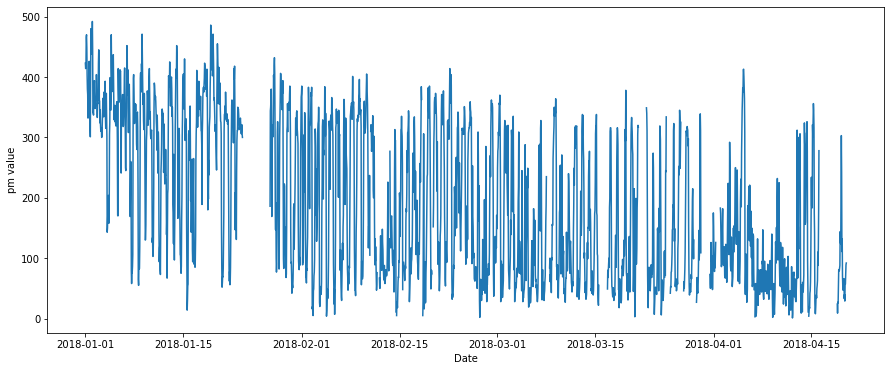

In [15]:
#plotting the graph for updated dataframe
plot_ts(data1)

In [16]:
#checking nan values in dataset
data1[data1.pm.isna()]

pm
Date                   
2018-01-23 13:00:00 NaN
2018-01-23 14:00:00 NaN
2018-01-23 15:00:00 NaN
2018-01-23 16:00:00 NaN
2018-01-23 17:00:00 NaN
...                  ..
2018-04-18 12:00:00 NaN
2018-04-18 13:00:00 NaN
2018-04-18 14:00:00 NaN
2018-04-18 15:00:00 NaN
2018-04-18 16:00:00 NaN

[323 rows x 1 columns]

In [17]:
data1.pm.describe()

count    2294.000000
mean      193.728858
std       126.488902
min         1.000000
25%        76.000000
50%       167.000000
75%       317.000000
max       492.000000
Name: pm, dtype: float64

<AxesSubplot:xlabel='pm'>

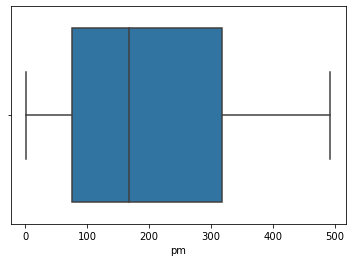

In [18]:
sns.boxplot(data1.pm)

In [19]:
#customised graph using ploty library
import plotly.express as px

fig = px.line(data1,x = data1.index,y='pm',title = 'PM2.5 with slider')

fig.update_xaxes(rangeslider_visible = True,
                 rangeselector = dict(
                     buttons = list([ 
                         dict(count=1, label='1m', step='month',stepmode='backward'),
                         dict(count=2, label='2m', step='month',stepmode='backward'),
                         dict(step='all')
                     ])
                 ))
fig.show()

In [20]:
#creating another DataFrame
data2 = data1.reset_index(level=0)
data2.head()

Date     pm
0 2018-01-01 00:00:00  423.0
1 2018-01-01 01:00:00  414.0
2 2018-01-01 02:00:00  417.0
3 2018-01-01 03:00:00  466.0
4 2018-01-01 04:00:00  470.0

In [21]:
#NaN values are imputed with previous day data
x = data2[data2.pm.isna()]
for i in x.index:
    data2.pm[i] = data2.pm[i-24]
data2.set_index('Date',inplace=True)

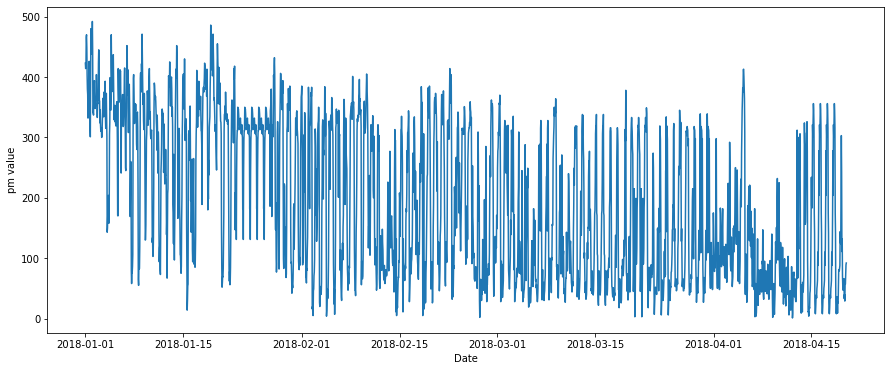

In [22]:
#plotting the imputed value data
plot_ts(data2)

In [23]:
#defining trend and seasonality
def seasonal_decompose(x):
    from statsmodels.tsa.seasonal import seasonal_decompose
    decomposition = seasonal_decompose(x)

    trend = decomposition.trend
    seasonal = decomposition.seasonal
    residual = decomposition.resid

    plt.figure(figsize=(15,6))
    plt.subplot(411)
    plt.plot(x, label='Original')
    plt.legend(loc='best')
    plt.subplot(412)
    plt.plot(trend, label='Trend')
    plt.legend(loc='best')
    plt.subplot(413)
    plt.plot(seasonal, label='Seasonal')
    plt.legend(loc='best')
    plt.subplot(414)
    plt.plot(residual, label='Residual')
    plt.legend(loc='best')
    plt.tight_layout()

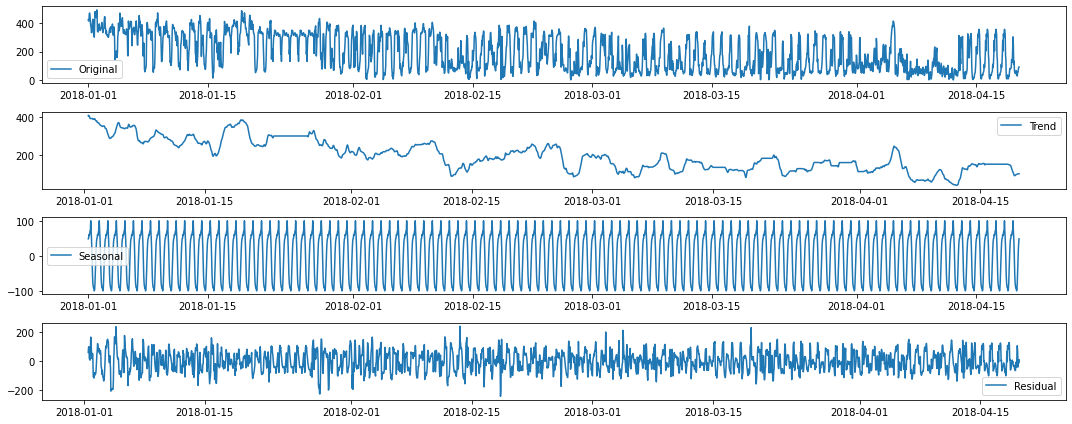

In [24]:
#to check trend and seasonality
seasonal_decompose(data2)

In [25]:
#checking stationarity of time series using ADF test
#importing the library
from statsmodels.tsa.stattools import adfuller

In [26]:
#defining the rolling statistics and ADF test results
def test_stat(pm):
    #rolling statistics
    rol_mean = pm.rolling(window=24).mean()
    rol_std = pm.rolling(window=24).std()
    #plotting rolling statistics
    plt.figure(figsize=(15,6))
    orig = plt.plot(pm,color='blue',label='Original')
    mean = plt.plot(rol_mean,color='red',label='rol_mean')
    std = plt.plot(rol_std,color='black',label='rol_std')
    plt.legend(loc='best')
    plt.show(block=False)
    
    
    #ADF test
    result = adfuller(pm,autolag='AIC')
    labels = ['ADF test statistics','p-value','#lags used','#observations used']
    for value, label in zip(result,labels):
        print(label + ':' + str(value))
        
    for key, value in result[4].items():
        print('Critial Values:')
        print(f'   {key}, {value}') 
    
    if(result[1] <= 0.05):
        print('Time series is stationary')
    else:
        print('Time series is not stationary')

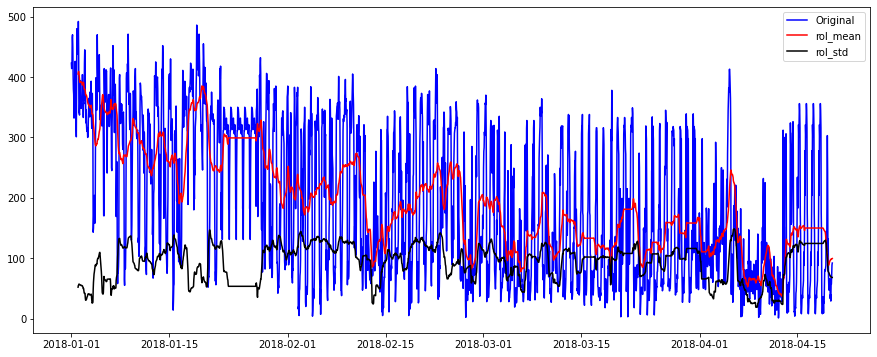

ADF test statistics:-3.3410722892386895
p-value:0.013139437460214218
#lags used:27
#observations used:2589
Critial Values:
   1%, -3.432878310326342
Critial Values:
   5%, -2.8626570109517075
Critial Values:
   10%, -2.567364625328271
Time series is stationary


In [27]:
#checking for stationarity
test_stat(data2)

In [28]:
#Differencing
data2['seasonal_difference'] = data2.pm - data2.pm.shift(1)
data2.tail(10)

pm  seasonal_difference
Date                                          
2018-04-19 15:00:00  61.0                  7.0
2018-04-19 16:00:00  66.0                  5.0
2018-04-19 17:00:00  33.0                -33.0
2018-04-19 18:00:00  40.0                  7.0
2018-04-19 19:00:00  29.0                -11.0
2018-04-19 20:00:00  57.0                 28.0
2018-04-19 21:00:00  57.0                  0.0
2018-04-19 22:00:00  75.0                 18.0
2018-04-19 23:00:00  89.0                 14.0
2018-04-20 00:00:00  92.0                  3.0

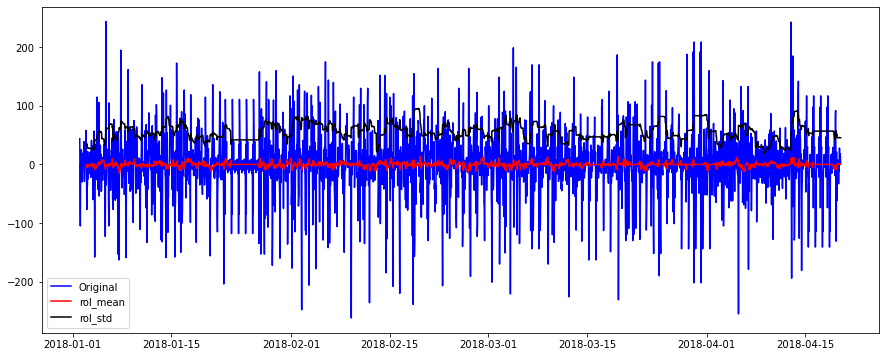

ADF test statistics:-15.483501582954117
p-value:2.53827218694895e-28
#lags used:26
#observations used:2566
Critial Values:
   1%, -3.4329009952311145
Critial Values:
   5%, -2.862667028885445
Critial Values:
   10%, -2.5673699589633365
Time series is stationary


In [29]:
#Again checking for stationarity after shifting
test_stat(data2.seasonal_difference[24:])

Since p-value is less than 0.05 hence the time series is stationary

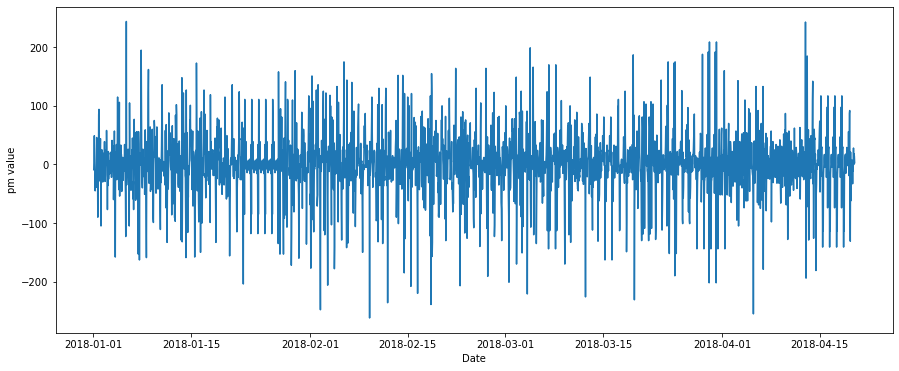

In [30]:
#plotting shifted data
plot_ts(data2.seasonal_difference)

In [31]:
#importing the library to plot ACF and PACF
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

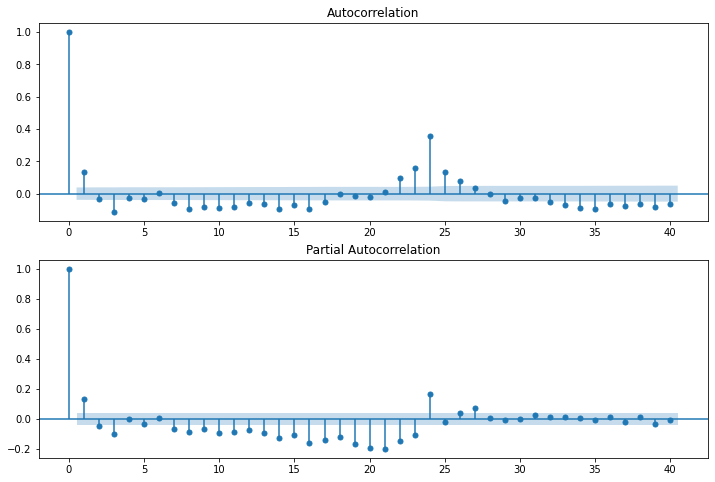

In [32]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(data2.seasonal_difference[1:],ax=ax1,lags=40)
ax2 = fig.add_subplot(212)
fig = plot_pacf(data2.seasonal_difference[1:],ax=ax2,lags=40)

In [34]:
#Splitting the data
train = data2.pm[:-24]
test = data2.pm[-24:]
print('Shape of splitting:')
print('train = {}, test = {}'.format(train.shape,test.shape))

Shape of splitting:
train = (2593,), test = (24,)


### AR model

In [39]:
#AR model
from statsmodels.tsa.ar_model import AR
model_ar = AR(train).fit()

C:\Users\Chinmaya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency H will be used.



In [42]:
data2['forecast_ar'] = model_ar.predict(start=2593,end=2617,dynamic=True)

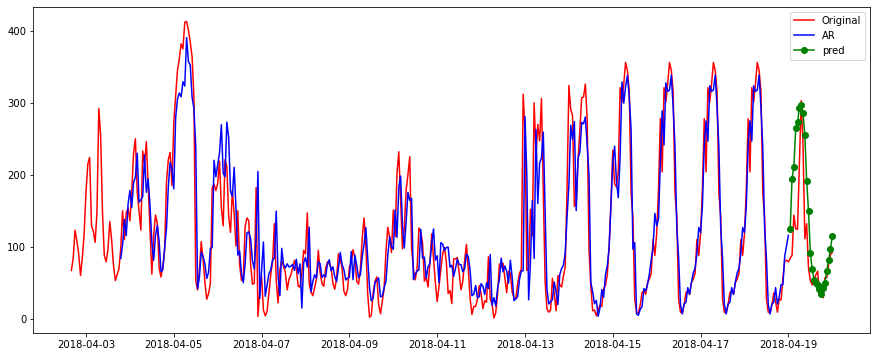

In [43]:
#plotting the graphs
plt.figure(figsize=(15,6))

#actual data
plt.plot(data2.pm[2200:],label='Original',color='red')

#fitted SES data
plt.plot(model_ar.fittedvalues[2200:],label='AR',color='blue')

plt.plot(data2['forecast_ar'],label='pred',color='green',marker='o')
plt.legend()

In [44]:
AR_AIC = model_ar.aic
print('AIC value = ',AR_AIC)

AIC value =  7.748429535517264


In [46]:
#Calculating the RMSE values
from sklearn.metrics import mean_squared_error

RMSE_ar = np.sqrt(mean_squared_error(test,data2.forecast_ar[2593:2617]))
print('RMSE : ',RMSE_ar)

RMSE :  65.10828114044618


### ARMA model

In [80]:
from statsmodels.tsa.arima_model import ARIMA

#ARMA model
model_arma = ARIMA(train,order=(4,0,4)).fit(disp=0)
model_arma.summary()

C:\Users\Chinmaya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency H will be used.

C:\Users\Chinmaya\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

C:\Users\Chinmaya\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                     pm   No. Observations:                 2593
Model:                     ARMA(4, 4)   Log Likelihood              -13899.846
Method:                       css-mle   S.D. of innovations             51.426
Date:                Sat, 20 Feb 2021   AIC                          27819.692
Time:                        14:42:39   BIC                          27878.298
Sample:                    01-01-2018   HQIC                         27840.929
                         - 04-19-2018                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        194.7769      7.245     26.883      0.000     180.576     208.977
ar.L1.pm       1.7732   7.81e-05   2.27e+04      0.000       1.773       1.773
ar.L2.pm       0.1477   2.34e-05   6303.134      0.000       0.148       0.148
ar.L3.pm      -1.7834   1.08e-05  -1.65e+05      0.000      -1.783      -1.783
ar.L4.pm       0.8409   2.09e-05   4.03e+04      0.000       0.841       0.841
ma.L1.pm      -0.7835      0.019    -40.796      0.000      -0.821      -0.746
ma.L2.pm      -1.0621      0.018    -58.363      0.000      -1.098      -1.026
ma.L3.pm       0.8527      0.018     46.687      0.000       0.817       0.889
ma.L4.pm       0.1479      0.019      7.677      0.000       0.110       0.186
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.0002           -0.0000j            1.0002           -0.5000
AR.2            0.9661           -0.2585j            1.0001           -0.0416
AR.3            0.9661           +0.2585j            1.0001            0.0416
AR.4            1.1888           -0.0000j            1.1888           -0.0000
MA.1           -1.0050           -0.0000j            1.0050           -0.5000
MA.2            0.9683           -0.2588j            1.0023           -0.0416
MA.3            0.9683           +0.2588j            1.0023            0.0416
MA.4           -6.6954           -0.0000j            6.6954           -0.5000
-----------------------------------------------------------------------------
"""

In [81]:
data2['forecast_arma'] = model_arma.predict(start=2593,end=2617,dynamic=True)

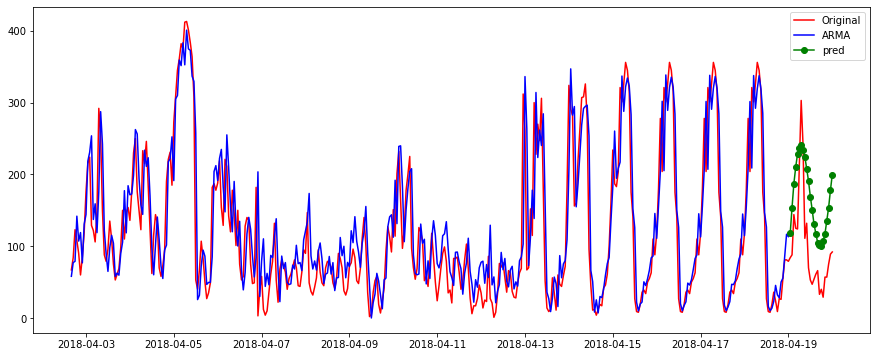

In [82]:
#plotting the graphs
plt.figure(figsize=(15,6))

#actual data
plt.plot(data2.pm[2200:],label='Original',color='red')

#fitted SES data
plt.plot(model_arma.fittedvalues[2200:],label='ARMA',color='blue')

plt.plot(data2['forecast_arma'],label='pred',color='green',marker='o')
plt.legend()

In [83]:
ARMA_AIC = model_arma.aic
print('AIC value = ',ARMA_AIC)

AIC value =  27819.69190251633


In [84]:
#Calculating the RMSE values
RMSE_arma = np.sqrt(mean_squared_error(test,data2.forecast_arma[2593:2617]))
print('RMSE : ',RMSE_arma)

RMSE :  78.66028444133914


### ARIMA Model

In [85]:
#ARIMA Model
model_arima = ARIMA(train,order=(4,1,4)).fit(disp=0)
model_arima.summary()

C:\Users\Chinmaya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency H will be used.

C:\Users\Chinmaya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency H will be used.



<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                   D.pm   No. Observations:                 2592
Model:                 ARIMA(4, 1, 4)   Log Likelihood              -13899.441
Method:                       css-mle   S.D. of innovations             51.577
Date:                Sat, 20 Feb 2021   AIC                          27818.881
Time:                        14:43:03   BIC                          27877.483
Sample:                    01-01-2018   HQIC                         27840.117
                         - 04-19-2018                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1165      0.269     -0.434      0.665      -0.643       0.410
ar.L1.D.pm     0.7840      0.166      4.710      0.000       0.458       1.110
ar.L2.D.pm     0.5251      0.283      1.852      0.064      -0.030       1.081
ar.L3.D.pm    -0.0415      0.214     -0.194      0.846      -0.460       0.377
ar.L4.D.pm    -0.4215      0.108     -3.885      0.000      -0.634      -0.209
ma.L1.D.pm    -0.7774      0.160     -4.856      0.000      -1.091      -0.464
ma.L2.D.pm    -0.6587      0.275     -2.396      0.017      -1.198      -0.120
ma.L3.D.pm    -0.0429      0.198     -0.216      0.829      -0.431       0.345
ma.L4.D.pm     0.5198      0.101      5.144      0.000       0.322       0.718
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0329           -0.2615j            1.0655           -0.0395
AR.2            1.0329           +0.2615j            1.0655            0.0395
AR.3           -1.0821           -0.9586j            1.4456           -0.3846
AR.4           -1.0821           +0.9586j            1.4456            0.3846
MA.1            1.0361           -0.1232j            1.0434           -0.0188
MA.2            1.0361           +0.1232j            1.0434            0.0188
MA.3           -0.9949           -0.8817j            1.3294           -0.3846
MA.4           -0.9949           +0.8817j            1.3294            0.3846
-----------------------------------------------------------------------------
"""

In [86]:
data2['forecast_arima'] = model_arima.predict(start=2593,end=2617,dynamic=True)

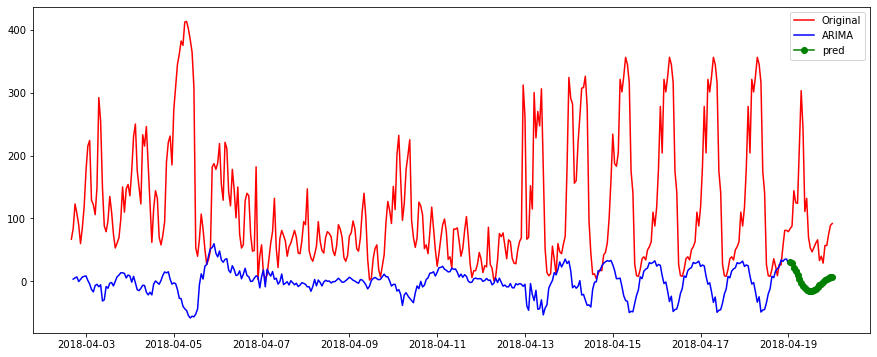

In [87]:
#plotting the graphs
plt.figure(figsize=(15,6))

#actual data
plt.plot(data2.pm[2200:],label='Original',color='red')

#fitted SES data
plt.plot(model_arima.fittedvalues[2200:],label='ARIMA',color='blue')

plt.plot(data2.forecast_arima,label='pred',color='green',marker='o')
plt.legend()

In [88]:
ARIMA_AIC = model_arima.aic
print('AIC value = ',ARIMA_AIC)

AIC value =  27818.881037431784


In [89]:
#Calculating the RMSE values
RMSE_arima = np.sqrt(mean_squared_error(test,data2.forecast_arima[2593:2617]))
print('RMSE : ',RMSE_arima)

RMSE :  119.2653926334848


### SARIMAX model

In [92]:
import statsmodels.api as sm
model_sarimax = sm.tsa.statespace.SARIMAX(train,order=(1,0,1),seasonal_order=(1,0,1,24)).fit()

C:\Users\Chinmaya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency H will be used.

C:\Users\Chinmaya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency H will be used.



In [93]:
model_sarimax.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                 pm   No. Observations:                 2593
Model:             SARIMAX(1, 0, 1)x(1, 0, 1, 24)   Log Likelihood              -13792.056
Date:                            Sat, 20 Feb 2021   AIC                          27594.113
Time:                                    15:49:01   BIC                          27623.416
Sample:                                01-01-2018   HQIC                         27604.731
                                     - 04-19-2018                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7597      0.014     54.304      0.000       0.732       0.787
ma.L1          0.1534      0.018      8.444      0.000       0.118       0.189
ar.S.L24       0.9941      0.001    708.699      0.000       0.991       0.997
ma.S.L24      -0.8790      0.009    -93.163      0.000      -0.898      -0.861
sigma2      2399.9140     45.987     52.187      0.000    2309.782    2490.046
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):               704.17
Prob(Q):                              0.85   Prob(JB):                         0.00
Heteroskedasticity (H):               0.98   Skew:                            -0.21
Prob(H) (two-sided):                  0.74   Kurtosis:                         5.52
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [94]:
data2['forecast_sarimax'] = model_sarimax.predict(start=2593,end=2617,dynamic=True)

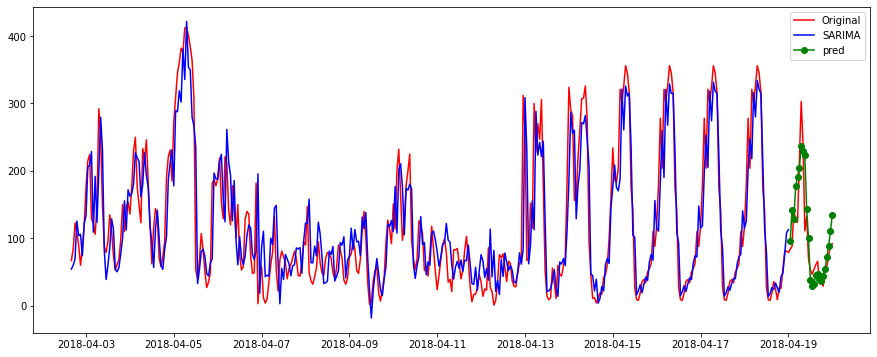

In [95]:
#plotting the graphs
plt.figure(figsize=(15,6))

#actual data
plt.plot(data2.pm[2200:],label='Original',color='red')

#fitted SES data
plt.plot(model_sarimax.fittedvalues[2200:],label='SARIMA',color='blue')

plt.plot(data2.forecast_sarimax,label='pred',color='green',marker='o')
plt.legend()

In [96]:
SARIMAX_AIC = model_sarimax.aic
print('AIC value = ',SARIMAX_AIC)

AIC value =  27594.11285450591


In [97]:
#Calculating the RMSE values
RMSE_sarimax = np.sqrt(mean_squared_error(test,data2.forecast_sarimax[2593:2617]))
print('RMSE : ',RMSE_sarimax)

RMSE :  37.370576578841636


### SimpleExpSmoothing

In [98]:
#importing the model
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [99]:
model_SES = SimpleExpSmoothing(train).fit(smoothing_level=0.8,optimized=False)

C:\Users\Chinmaya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency H will be used.



In [100]:
model_SES.params

{'smoothing_level': 0.8,
 'smoothing_trend': None,
 'smoothing_seasonal': None,
 'damping_trend': nan,
 'initial_level': 423.0,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [101]:
data2['forecast_SES'] = model_SES.forecast(24)

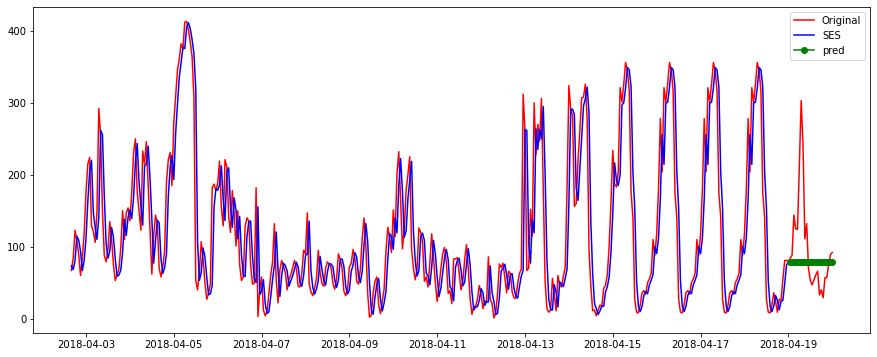

In [102]:
#plotting the graphs
plt.figure(figsize=(15,6))

#actual data
plt.plot(data2.pm[2200:],label='Original',color='red')

#fitted SES data
plt.plot(model_SES.fittedvalues[2200:],label='SES',color='blue')

plt.plot(data2['forecast_SES'],label='pred',color='green',marker='o')
plt.legend()

In [103]:
SES_AIC = model_SES.aic
print('AIC value = ',SES_AIC)

AIC value =  21129.373532761503


In [104]:
#Calculating the RMSE values
from sklearn.metrics import mean_squared_error
#Calculating the RMSE values
RMSE_SES = np.sqrt(mean_squared_error(test,data2.forecast_SES[2593:2617]))
print('RMSE : ',RMSE_SES)

RMSE :  69.70806177682861


### Holt method

In [105]:
#importing the models
from statsmodels.tsa.holtwinters import Holt

In [106]:
model_hw = Holt(train,damped=True).fit(smoothing_level=0.8)

C:\Users\Chinmaya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency H will be used.



In [107]:
model_hw.params

{'smoothing_level': 0.8,
 'smoothing_trend': 0.005,
 'smoothing_seasonal': nan,
 'damping_trend': 0.99,
 'initial_level': 423.0,
 'initial_trend': -9.0,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [109]:
data2['forecast_holt'] = model_hw.forecast(24)

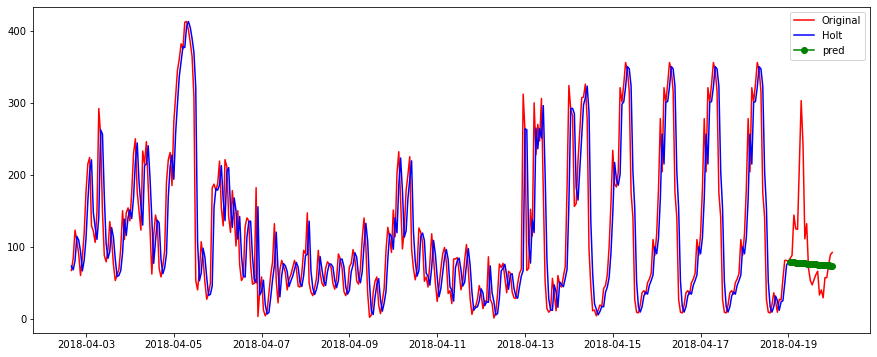

In [110]:
#plotting the graphs
plt.figure(figsize=(15,6))

#actual data
plt.plot(data2.pm[2200:],label='Original',color='red')

#fitted SES data
plt.plot(model_hw.fittedvalues[2200:],label='Holt',color='blue')

plt.plot(data2['forecast_holt'],label='pred',color='green',marker='o')
plt.legend()

In [111]:
HW_AIC = model_hw.aic
print('AIC value = ',HW_AIC)

AIC value =  21149.33831759119


In [112]:
#Calculating the RMSE values
RMSE_holt = np.sqrt(mean_squared_error(test,data2.forecast_holt[2593:2617]))
print('RMSE : ',RMSE_holt)

RMSE :  69.92011151431228


### Exponential Smoothing - Additive

In [113]:
#importing the libraries
from statsmodels.tsa.holtwinters import ExponentialSmoothing 

In [114]:
model_ES_add = ExponentialSmoothing(train,seasonal_periods=24,seasonal="additive").fit(smoothing_level=0.8)

C:\Users\Chinmaya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency H will be used.



In [115]:
model_ES_add.params

{'smoothing_level': 0.8,
 'smoothing_trend': nan,
 'smoothing_seasonal': 0.17664113911554255,
 'damping_trend': nan,
 'initial_level': 194.58841922306948,
 'initial_trend': nan,
 'initial_seasons': array([289.61394508, 290.59183464, 261.17044815, 243.29266011,
        235.30923207, 228.84620858, 209.08122418, 198.35659974,
        159.9142498 , 114.84342785,  86.45481467,  86.22356622,
         65.37875631,  43.91198529,  34.36462961,   2.44364356,
         17.42629364,  45.12078863,  78.38015837, 140.71739984,
        204.60501659, 233.71459329, 250.96534386, 263.91142285]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [116]:
data2['forecast_ES_add'] = model_ES_add.forecast(24)

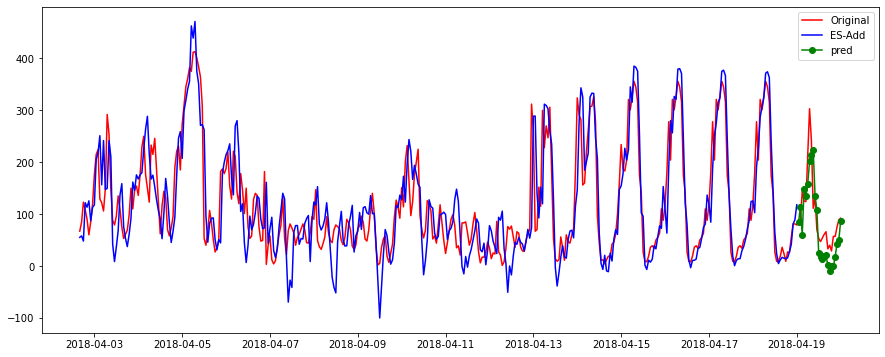

In [117]:
#plotting the graphs
plt.figure(figsize=(15,6))

#actual data
plt.plot(data2.pm[2200:],label='Original',color='red')

#fitted SES data
plt.plot(model_ES_add.fittedvalues[2200:],label='ES-Add',color='blue')

plt.plot(data2.forecast_ES_add,label='pred',color='green',marker='o')
plt.legend()

In [118]:
ES_ADD_AIC = model_ES_add.aic
print('AIC value = ',ES_ADD_AIC)

AIC value =  20877.951198409355


In [119]:
#Calculating the RMSE values
RMSE_ES_add = np.sqrt(mean_squared_error(test,data2.forecast_ES_add[2593:2617]))
print('RMSE : ',RMSE_ES_add)

RMSE :  47.86235600453481


### Exponential Smoothing - Multiplicative

In [120]:
model_ES_mul = ExponentialSmoothing(train,seasonal_periods=24,seasonal="multiplicative").fit(smoothing_level=0.8)

C:\Users\Chinmaya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency H will be used.



In [121]:
model_ES_mul.params

{'smoothing_level': 0.8,
 'smoothing_trend': nan,
 'smoothing_seasonal': 0.03372488458824611,
 'damping_trend': nan,
 'initial_level': 245.1850583719306,
 'initial_trend': nan,
 'initial_seasons': array([3.5646464 , 3.78615263, 3.87855072, 3.97640922, 3.9951527 ,
        3.86418728, 3.69690836, 3.86171449, 3.56748486, 3.106373  ,
        2.64871735, 2.46678776, 2.28319599, 2.06139037, 1.98494544,
        1.7140064 , 1.67621734, 1.78913965, 1.87197333, 2.13330877,
        2.6022245 , 3.05219859, 3.50231997, 3.71575266]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [122]:
data2['forecast_ES_mul'] = model_ES_mul.forecast(24)

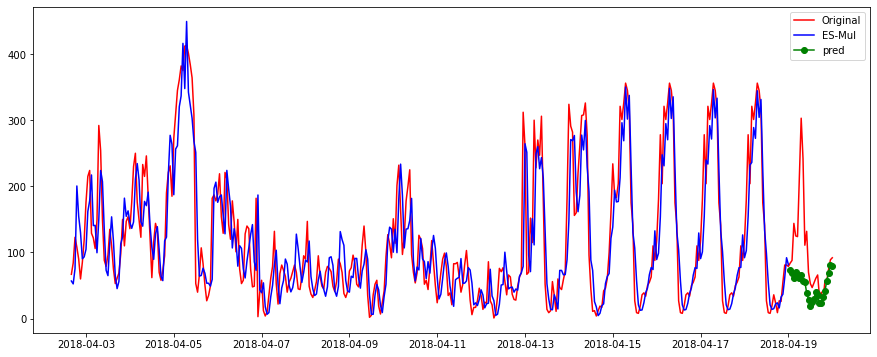

In [123]:
#plotting the graphs
plt.figure(figsize=(15,6))

#actual data
plt.plot(data2.pm[2200:],label='Original',color='red')

#fitted SES data
plt.plot(model_ES_mul.fittedvalues[2200:],label='ES-Mul',color='blue')

plt.plot(data2.forecast_ES_mul,label='pred',color='green',marker='o')
plt.legend()

In [124]:
ES_MUL_AIC = model_ES_mul.aic
print('AIC value = ',ES_MUL_AIC)

AIC value =  20897.464003984933


In [125]:
#Calculating the RMSE values
RMSE_ES_mul = np.sqrt(mean_squared_error(test,data2.forecast_ES_mul[2593:2617]))
print('RMSE : ',RMSE_ES_mul)

RMSE :  77.55213468989584


### Consolidating the results

In [126]:
Index = ['AR','ARMA','ARIMA','SARIMA','SimpleExpSmoothing','Holt method','Exponential Add','Exponential Mul']
RMSE = [RMSE_ar, RMSE_arma, RMSE_arima, RMSE_sarimax, RMSE_SES, RMSE_holt, RMSE_ES_add, RMSE_ES_mul]
AIC = ['-', ARMA_AIC, ARIMA_AIC, SARIMAX_AIC,SES_AIC,HW_AIC,ES_ADD_AIC,ES_MUL_AIC]
result = pd.DataFrame({'RMSE':RMSE,'AIC':AIC},index=Index)
result

RMSE      AIC
AR                   65.108281        -
ARMA                 78.660284  27819.7
ARIMA               119.265393  27818.9
SARIMA               37.370577  27594.1
SimpleExpSmoothing   69.708062  21129.4
Holt method          69.920112  21149.3
Exponential Add      47.862356    20878
Exponential Mul      77.552135  20897.5

In [ ]:
start = datetime.datetime.strptime("20-04-2018", "%d-%m-%Y")
end = datetime.datetime.strptime("25-04-2018", "%d-%m-%Y")

x=[]
for i in range(0, (end-start).days):
    for j in range(0,24):
        date_generated = start + datetime.timedelta(days=i,hours=j)
        x.append(date_generated)
x = pd.DataFrame(x[1:],columns=['Date'])
x.set_index("Date", inplace = True)
x.tail()

In [ ]:
data2 = pd.concat([data2,x],axis=0)

In [ ]:
data2['final_forecast'] = model_sarimax.predict(start=2617,end=2750)
data2[['pm','final_forecast']][2500:2750].plot(figsize=(15,8))

In [ ]:
data2['final_forecast'].tail(48)

In [ ]:
#creating pickle file
import pickle

pickle_out = open('model.pkl','wb')
pickle.dump(model_sarimax,pickle_out)
pickle_out.close()

In [ ]:
x = model_sarimax.predict(y)

In [ ]:
x[0]

In [ ]:
start = datetime.datetime.strptime("20-04-2018", "%d-%m-%Y")
y= start + datetime.timedelta(hours=20)
print(y)

In [ ]:
m = []
start = y
for j in range(0,24):
    date_generated = start + datetime.timedelta(hours=j)
    m.append(date_generated)
m = pd.DataFrame(m[1:],columns=['Date'])
m.set_index("Date", inplace = True)
m